# Проект по А/B-тестированию

Задача — провести оценку результатов A/B-теста. В  распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.
Требуется:
- Оценить корректность проведения теста
- Проанализировать результаты теста

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-изучение-общей-информации" data-toc-modified-id="Загрузка-данных-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-датой" data-toc-modified-id="Работа-с-датой-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с датой</a></span></li><li><span><a href="#Поиск-дубликатов-и-пропусков" data-toc-modified-id="Поиск-дубликатов-и-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск дубликатов и пропусков</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Проверка-технического-задания-на-корректность" data-toc-modified-id="Проверка-технического-задания-на-корректность-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка технического задания на корректность</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-количества-событий-на-пользователя-в-выборках" data-toc-modified-id="Распределение-количества-событий-на-пользователя-в-выборках-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Распределение количества событий на пользователя в выборках</a></span></li><li><span><a href="#Даты-регистрации-пользователей" data-toc-modified-id="Даты-регистрации-пользователей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Даты регистрации пользователей</a></span></li><li><span><a href="#Распределение-числа-событий-по-дням" data-toc-modified-id="Распределение-числа-событий-по-дням-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Распределение числа событий по дням</a></span></li><li><span><a href="#Изменение-конверсии-в-воронке-в-выборках-на-разных-этапах" data-toc-modified-id="Изменение-конверсии-в-воронке-в-выборках-на-разных-этапах-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изменение конверсии в воронке в выборках на разных этапах</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Оценка-результатов-A/B-тестирования" data-toc-modified-id="Оценка-результатов-A/B-тестирования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка результатов A/B-тестирования</a></span></li><li><span><a href="#Результаты-работы" data-toc-modified-id="Результаты-работы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Результаты работы</a></span></li></ul></div>

## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go 
import plotly.express as px
from statsmodels. stats.weightstats import ztest as ztest
from scipy import stats as st
import numpy as np
import math as mth

In [2]:
marketing_events=pd.read_csv('/datasets/ab_project_marketing_events.csv')

In [3]:
new_users=pd.read_csv('/datasets/final_ab_new_users.csv')

In [4]:
participants=pd.read_csv('/datasets/final_ab_participants.csv')

In [5]:
final_ab_events=pd.read_csv('/datasets/final_ab_events.csv')

In [6]:
marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


В данном датасете хранятся маркетинговые события за 2020 год. В нем следующие столбцы: название события, регион, начальная дата и окончание

In [7]:
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


В столбцах с датой неверно указан тип данных. Нужно будет изменить

In [8]:
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


В данной таблице хранятся данные по всем пользователям, зарегистрировавшимся с 7 по 21 декабря 2020 года. Есть столбцы с уникальным номером пользователя, датой регистрации, регионом и типом устройства.

In [9]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


Здесь также имеются проблемы с датой

In [10]:
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


Это таблица участников тестов. В ней хранятся id пользователей, номер группы и название теста

In [11]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


Проблем с типами данных нет

In [12]:
final_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


В этйо таблице хранятся действия новых пользователей в период с 7 декабря 2020 по 4 января 2021 года. В столбцах указаны id пользователя, дата события, название события, дополнительные данные

In [13]:
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


Здесь также проблема с датой

## Предобработка данных

### Работа с датой 

Приведем дату в marketing_events,new_users, final_ab_events к нужному виду

In [14]:
marketing_events['start_dt']=pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt']=pd.to_datetime(marketing_events['finish_dt'])

In [15]:
new_users['first_date']=pd.to_datetime(new_users['first_date'])

In [16]:
final_ab_events['event_dt']=final_ab_events['event_dt'].astype('datetime64[D]')


Во всех таблицах стоблцы с датой приведены к нужному типу

### Поиск дубликатов и пропусков

In [17]:
marketing_events.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [18]:
marketing_events.duplicated().sum()

0

В marketing_events пропусков и дубликатов нет

In [19]:
new_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [20]:
new_users.duplicated().sum()

0

В new_users пропусков и дубликатов тоже нет

In [21]:
participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [22]:
participants.duplicated().sum()

0

Пропусков, дубликатов не обнаружено

In [23]:
final_ab_events.duplicated().sum()

2

Найдено два дубликата, удалим их

In [24]:
final_ab_events=final_ab_events.drop_duplicates()

In [25]:
final_ab_events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       377576
dtype: int64

В данной таблице также есть пропуски в столбце details

In [26]:
final_ab_events['details'].value_counts()

4.99      46361
9.99       9530
99.99      5631
499.99     1217
Name: details, dtype: int64

Пропуски здесь могут быть объяснены тем, что данный столбец хранит в себе данные по стоимости покупки, а они отображаюся только при покупке, событие purchase

На всякий случай посмотрим есть ли пропуски в details при событии purchase

In [27]:
final_ab_events['event_name'].isna().sum()

0

In [28]:
final_ab_events[final_ab_events['event_name']=='purchase']['details'].isna().sum()

0

Пропусков нет

In [29]:
check_details=final_ab_events[final_ab_events['event_name']!='purchase']

In [30]:
check_details['details'].value_counts()

Series([], Name: details, dtype: int64)

Пропуски в столбце details во всех этапах покупки кроме purchase

### Выводы 

На этапе предобработки была проведена проверка на наличие пропусков и дубликатов. Были удалены дубликаты и найдены пропуски в датафрейме final_ab_events. Пропуски объясняются тем, что  столбец с пропусками хранит в себе данные по стоимости покупки, а они отображаюся только при покупке, событие purchase. Также были приведены столбцы с датой к нужному виду

## Проверка технического задания на корректность

In [31]:
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [32]:
min(new_users['first_date'])

Timestamp('2020-12-07 00:00:00')

In [33]:
max(new_users['first_date'])

Timestamp('2020-12-23 00:00:00')

In [34]:
new_users=new_users.query('first_date<="2020-12-21"')

In [35]:
new_users['region'].value_counts()

EU           42340
N.America     8347
CIS           2900
APAC          2883
Name: region, dtype: int64

По техническому заданию нас интересуют только пользователи из Европы, удалим остальных

In [36]:
new_users=new_users[new_users['region']=='EU']

Присоединим таблицы new users и partisipants по user_id

In [37]:
new_users_participants=new_users.merge(participants)
new_users_participants.head()

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
1,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test
2,50734A22C0C63768,2020-12-07,EU,iPhone,B,interface_eu_test
3,E6DE857AFBDC6102,2020-12-07,EU,PC,B,recommender_system_test
4,E6DE857AFBDC6102,2020-12-07,EU,PC,B,interface_eu_test


In [38]:
data=new_users_participants.groupby(['ab_test', 'group', 'region']).agg({'user_id':'nunique'}).reset_index()

In [39]:
data

,ab_test,group,region,user_id
0,interface_eu_test,A,EU,5342
1,interface_eu_test,B,EU,5223
2,recommender_system_test,A,EU,3634
3,recommender_system_test,B,EU,2717


Всего проводилось 2 теста, из них нас по техническому заданию интересует только recommender_system_test, удалим interface_eu_test

In [40]:
data=data.drop([0,1],axis=0)

In [41]:
data

,ab_test,group,region,user_id
2,recommender_system_test,A,EU,3634
3,recommender_system_test,B,EU,2717


In [42]:
print(data['user_id'][2]-data['user_id'][3])

917


В группе А участвовало несколько больше человек чем в группе В. Впрочем это не является проблемой

In [43]:
data=new_users_participants[new_users_participants['ab_test']=='recommender_system_test']
data=data[data['region']=='EU']
data.head()

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
3,E6DE857AFBDC6102,2020-12-07,EU,PC,B,recommender_system_test
7,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test
10,831887FE7F2D6CBA,2020-12-07,EU,Android,A,recommender_system_test
12,4CB179C7F847320B,2020-12-07,EU,iPhone,B,recommender_system_test


In [44]:
data['user_id'].nunique()

6351

Всего в тесте участвовало 6351 человек, что несколько больше ичем упомянутые в тех задании 6000.

In [45]:
min(data['first_date'])

Timestamp('2020-12-07 00:00:00')

Начальная дата регистрации пользователей в recommender_system_test совпадает с значением в техническом задании

In [46]:
max(data['first_date'])

Timestamp('2020-12-21 00:00:00')

То же можно сказать и про конечную дату набора

Проверим действительно ли 15% новых пользователей из региона EU

In [47]:
new_1=data['user_id'].nunique()

In [48]:
new_users['user_id'].nunique()

42340

In [49]:
lkm=new_users.query("first_date<='2020-12-21'")
new_2=lkm[lkm['region']=='EU']['user_id'].count()

In [50]:
new_1/new_2

0.15

Да, все верно

Как уже было замечено, одновременно проводилось 2 теста: recommender_system_test и interface_eu_test. Проверим попали ли некоторые пользователи в оба теста

In [51]:
system=new_users_participants[new_users_participants['ab_test']=='recommender_system_test']
interface=new_users_participants[new_users_participants['ab_test']=='interface_eu_test']

In [52]:
str1=system['user_id'].reset_index()
str1=str1.drop('index', axis=1)
str1=str1['user_id'].tolist()

In [53]:
people=interface.query('user_id in @str1')
people['user_id'].count()

1602

Пересечения присутствуют

Посмотрим участвовали ли люди в двух тестовых группах одновременно

In [54]:
check=system.pivot_table(index='user_id', values='group',aggfunc='nunique')
(check['group']>1).value_counts()


False    6351
Name: group, dtype: int64

Таковых нет

В техническом задании указано, что ожидаемый эффект должен быть достигнут за 14 дней. Посмотрим все ли пользователи уложились в данное время

In [55]:
data_1=data.merge(final_ab_events)
data_1['event_name'].count()

23420

In [56]:
data_1['delta']=((data_1['event_dt']-data_1['first_date']).dt.days).astype('int')

Как следовало ожидать лайфтайм для некоторых пользователей составил больше 14 дней. Верным решением будет удалить события которые произошли после прошествия 14 дней от дня регистрации

In [57]:
data_1=data_1[data_1['delta']<=14]

In [58]:
data_1['event_name'].count()

22828

Проверим имели ли сторонние события влияние на поведение пользователей  групп

Посмотрим на дату последнего по времени события

In [59]:
max(data_1['event_dt'])

Timestamp('2020-12-29 00:00:00')

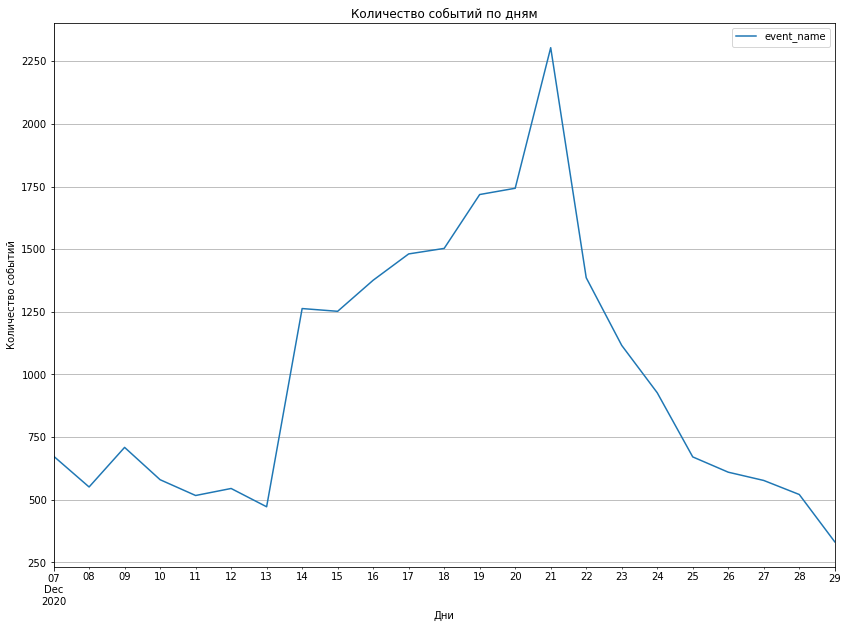

In [60]:
data_1.pivot_table(index='event_dt', values='event_name',aggfunc='count').plot(grid='true',figsize=(14, 10))
plt.title('Количество событий по дням')
plt.xlabel('Дни')
plt.ylabel('Количество событий') 
plt.show()

Отчетливо можно видеть резкий всплеск пользовательской активности 14 и 21 декабря

In [61]:
marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [62]:
marketing_events.query('start_dt>="2020-12-07" and finish_dt<="2021-01-03"')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


Несмотря на то, что тест проводился одновременно с новогодней распродажей, большого влияния на тест это не произвело. Так как пики количества событий приходятся на 14 и 21 числа а новогоднее промо началось 25 декабря. Хотя, безусловно, для большей корректности теста нужно было выбрать другие даты, так как все равно могут быть те, кто пришел именно из-за распродажи

### Выводы 

1) В таблице new_users были найдены пользователи из других регионов, что не является корректным
2) В техническом задании было указано что пользователей 6000, на деле их больше
3) Начальная дата регистрации пользователей в recommender_system_test совпадает с значением в техническом задании, то же можно сказать и про конечную дату набора
4) Одновременно с recommender_system_test проходил и другой тест: interface_eu_test. 1602 человека участвовали в обоих тестах
5) Пользователи не попадали одновременно в группы А и В
6) Тест пересекался с новогодней распродажей

## Исследовательский анализ данных 

### Распределение количества событий на пользователя в выборках

Группа А

In [63]:
data_1_pivot=data_1.pivot_table(index=['user_id','group'],values='event_name', aggfunc='count').reset_index()

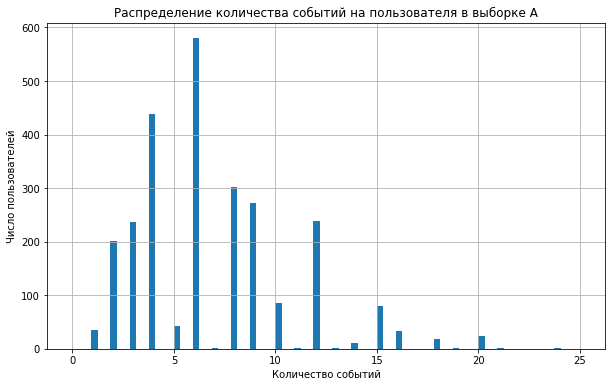

In [64]:
data_1_pivot[data_1_pivot['group']=='A'].hist(bins = 80, figsize = (10,6),range = (0,25))
plt.title('Распределение количества событий на пользователя в выборке А')
plt.xlabel('Количество событий')
plt.ylabel('Число пользователей') 
plt.show()

Чаще всего в первой группе пользователи совершают 4 или 6 действий. Остальные намного меньше

Группа В

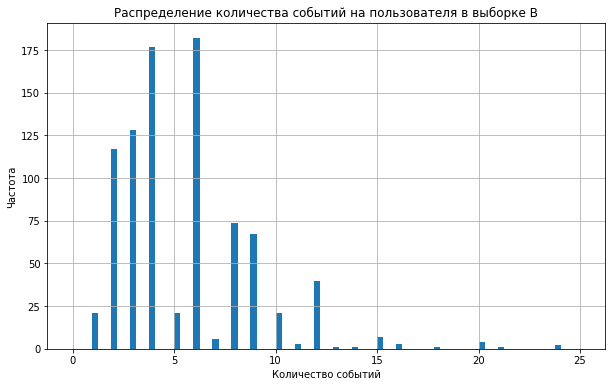

In [65]:
data_1_pivot[data_1_pivot['group']=='B'].hist(bins = 80, figsize = (10,6),range = (0,25))
plt.title('Распределение количества событий на пользователя в выборке В')
plt.xlabel('Количество событий')
plt.ylabel('Частота') 
plt.show()

В группе B количество действий в целом попоставимо с группой А, хотя и несколько уступает. соедует отметить, что группа А значительно превосходит в числе пользователей группу В

In [66]:
data_1_pivot.pivot_table(index='group',values='event_name', aggfunc='median')

,event_name
group,
A,6
B,4


В среднем в группе A пользователи совершали 6 действий, в группе B - 4

### Даты регистрации пользователей  

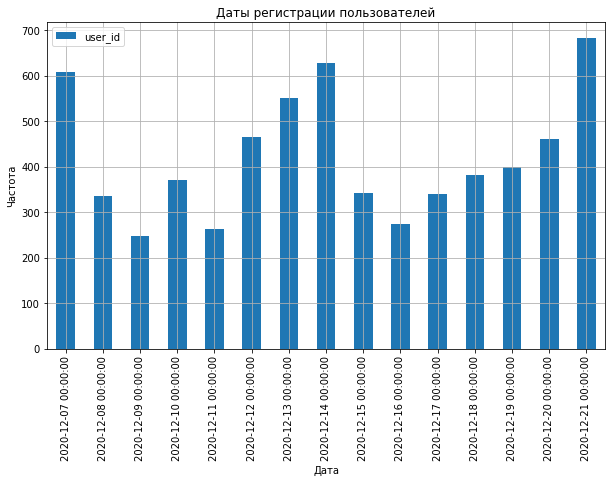

In [67]:
data.pivot_table(index='first_date',values='user_id',aggfunc='count').plot(kind='bar',grid=True,figsize = (10,6))
plt.title('Даты регистрации пользователей')
plt.xlabel('Дата')
plt.ylabel('Частота') 
plt.show()

Больше всего регистраций было в начале - 7, 13, 14 и 21 декабря

Посмотрим все ли пользоавтели участвовали в тесте

In [68]:
ss=final_ab_events['user_id'].tolist()

In [69]:
checki=data.query('user_id not in @ss')

In [70]:
checki['user_id'].count()

2870

Как можно заметить из 6351 участников теста 2870 человек не совершили ни одного действия.

In [71]:
checki['group'].value_counts()

B    1840
A    1030
Name: group, dtype: int64

Больше всего таких пользователей в группе В

Посмотрим когда эти пользователи зарегистрировались

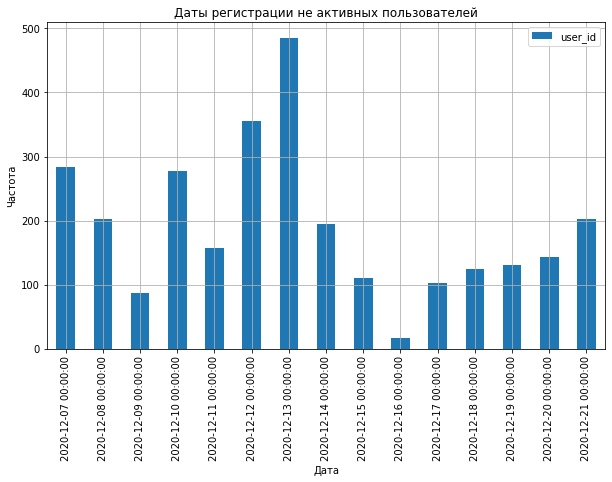

In [72]:
checki.pivot_table(index='first_date',values='user_id',aggfunc='count').plot(kind='bar',grid=True,figsize = (10,6))
plt.title('Даты регистрации не активных пользователей')
plt.xlabel('Дата')
plt.ylabel('Частота') 
plt.show()

Больше всего такого рода пользователи регистрировались 12 и 13 числа. Скорее всего в эти даты произошли технические неполадки и либо участники не смогли сделать заказ, либо данные просто не сохранились

### Распределение числа событий по дням

In [73]:
data_1_pivot2=data_1.pivot_table(index=['group','event_dt'],values='event_name',aggfunc='count').reset_index()

In [74]:
data_1_pivot2.head()

,group,event_dt,event_name
0,A,2020-12-07,318
1,A,2020-12-08,313
2,A,2020-12-09,371
3,A,2020-12-10,331
4,A,2020-12-11,356


In [75]:
fig = px.line(data_1_pivot2, # загружаем данные
              x='event_dt', # указываем столбец с данными для оси X
              y='event_name',color='group' # указываем столбец с данными для оси Y
              ) # отображаем маркеры (точки) на графике
#fig.update_layout(title='Распределение числа событий по дням',
                   #xaxis_title='Время',
                  # yaxis_title='События')
#fig.show() # выводим график

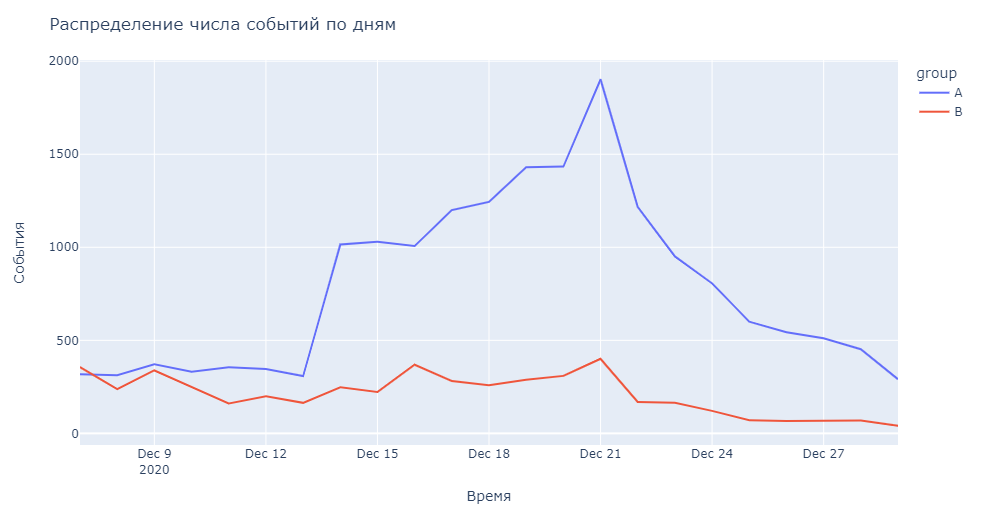

Резкий всплеск количества событий в группе А виден  14 и 21 декабря. После 21 декабря идет прродолжительынй спад. Пользователи из группы В более активны 9,16,21 декабря.

###  Изменение конверсии в воронке в выборках на разных этапах

In [76]:
data_1.head()

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details,delta
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07,product_page,NaN,0
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07,login,NaN,0
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07,product_page,NaN,0
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08,product_page,NaN,1
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10,product_page,NaN,3


In [77]:
ks=data_1.pivot_table(index='group',values='user_id', columns='event_name',aggfunc='nunique')


In [78]:
ks.insert(loc= 0 , column='users', value=[3634,2717])

In [79]:
def swap_columns (df, col1, col2):
    col_list = list(df.columns )
    x, y = col_list. index (col1), col_list. index (col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [80]:
ks1 = swap_columns (ks, 'product_cart', 'product_page')
ks2=ks1.copy()

In [81]:
ks2['login/users']=(ks2['login']/ks2['users'])-1

In [82]:
ks2['product_page/users']=(ks2['product_page']/ks2['users'])-1

In [83]:
ks2['product_cart/users']=(ks2['product_cart']/ks2['users'])-1

In [84]:
ks2['purchase/users']=(ks2['purchase']/ks2['users'])-1
ks2

event_name,users,login,product_page,product_cart,purchase,login/users,product_page/users,product_cart/users,purchase/users
group,,,,,,,,,
A,3634,2604,1685,782,833,-0.283434,-0.536324,-0.784810,-0.770776
B,2717,876,493,244,249,-0.677586,-0.818550,-0.910195,-0.908355


In [85]:
ks1=ks1.T

In [92]:
fig = px.funnel(ks1)
#fig.update_layout(title='Изменение конверсии в воронке в выборках на разных этапах',
                   #yaxis_title='Этап')
#fig.show() # выводим график

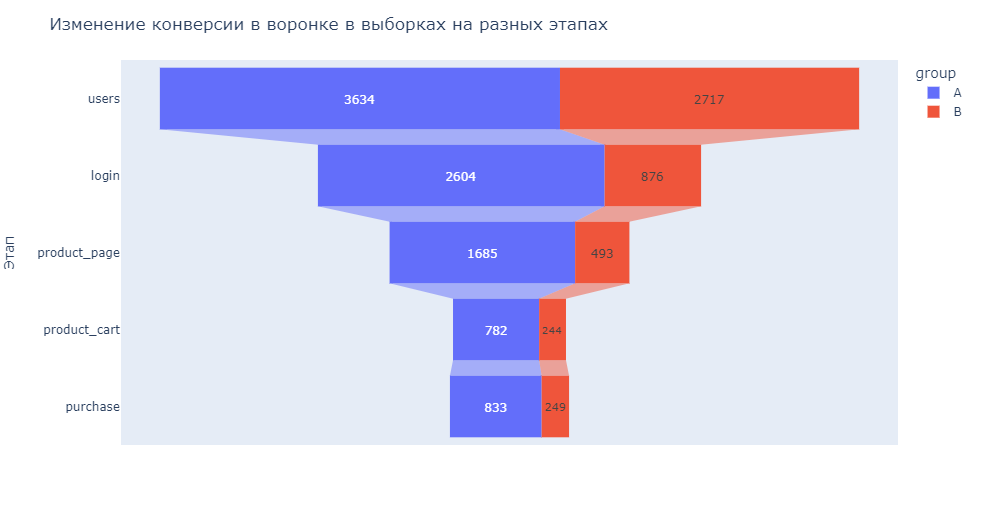

В группе А конверсия в целом распределена равномерно что нельзя сказать про пользователей из группы B. Из начальных 2717 человек, залогинились только 876 человек. И с каждым этапом это число продолжило падать. И купили товар в этой группе только 10%. Для сравнения в группе А эта цифра выше-23%. также следует отметить что, судя по всему, просмотр корзины это не обязательный пункт, так как в корзину зашло меньше человек чем купило товар.

### Выводы 

Было выяснено, что:
1) Чаще всего в первой группе пользователи совершают 4 или 6 действий. Остальные намного меньше,В группе B количество действий в целом попоставимо с группой А, хотя и несколько уступает. Следует отметить, что группа А значительно превосходит в числе пользователей группу В
2) Из 6351 участников теста 2870 человек не совершили ни одного действия. Причем больше всего таких пользователей в группе B. Такие пользователи регистрировались чаще всего 12 и 13 декабря. Возможно технический сбой.
3) Пользователи из группы А более активны начиная с 13 декабря по 21 декабря, пользователи из группы В более активны 9,16,21 декабря. К концу теста по какой-то причине намечается спад пользовательской активности
4) В группе А конверсия в целом распределена равномерно что нельзя сказать про пользователей из группы B. Из начальных 2717 человек, залогинились только 877 человек. И с каждым этапом это число продолжило падать. И купили товар в этой группе только 10%. Для сравнения в группе А эта цифра выше-23%. также следует отметить что, судя по всему, просмотр корзины это не обязательный пункт, так как в корзину зашло меньше человек чем купило товар.

Прежде чем приступать к тесту нужно учесть как эти так и другие факторы которые были рассмотрены в прошлых пунктах, в частности:
1) По какой-то причине в тесте участовали люди из других регионов мира(Данные пользователи были удалены)
2) Тест пересекался с новогодней распродажей
3) Одновременно проводилось 2 теста: recommender_system_test и interface_eu_test и часть пользователей участвовала в обоих тестах

## Оценка результатов A/B-тестирования

H0 - Доли контрольной и тестовой групп не отличаются друг от друга
H1 - Доли контрольной и тестовой групп  отличаются друг от друга

In [87]:
def z_test(c,s):

    alpha = .05/3 # критический уровень статистической значимости
    successes = np.array([c, s])
    trials = np.array([ks1['A'][0], ks1['B'][0]])

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2 
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ',"{0:.20f}".format(p_value)) 

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу, между долями есть значимая разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу,нет оснований считать доли разными') 
        

In [88]:
ks1

group,A,B
event_name,,
users,3634,2717
login,2604,876
product_page,1685,493
product_cart,782,244
purchase,833,249


In [89]:
print('product_page')
z_test(ks1['A'][2],ks1['B'][2])

product_page
p-значение:  0.00000000000000000000
Отвергаем нулевую гипотезу, между долями есть значимая разница


In [90]:
print('product_cart')
z_test(ks1['A'][3],ks1['B'][3])

product_cart
p-значение:  0.00000000000000000000
Отвергаем нулевую гипотезу, между долями есть значимая разница


In [91]:
print('purchase')
z_test(ks1['A'][4],ks1['B'][4])

purchase
p-значение:  0.00000000000000000000
Отвергаем нулевую гипотезу, между долями есть значимая разница


По результатам теста можно сказать, что конверсия в группе B, меньше чем в группе А.

## Результаты работы 

1) На этапе предобработки была проведена проверка на наличие пропусков и дубликатов. Были удалены дубликаты и найдены пропуски в датафрейме final_ab_events. Пропуски объясняются тем, что столбец с пропусками хранит в себе данные по стоимости покупки, а они отображаюся только при покупке, событие purchase. Также были приведены столбцы с датой к нужному виду.

2) Было выяснено, что:
   а) По какой-то причине в тесте участовали люди из других регионов мира(Данные пользователи были удалены)
   б) Тест пересекался с новогодней распродажей
   в) Одновременно проводилось 2 теста: recommender_system_test и interface_eu_test и часть пользователей участвовала в обоих тестах
   г) Чаще всего в первой группе пользователи совершают 4 или 6 действий. Остальные намного меньше,В группе B количество действий в целом попоставимо с группой А, хотя и несколько уступает. Следует отметить, что группа А значительно превосходит в числе пользователей группу В
   д) Из 6351 участников теста 2870 человек не совершили ни одного действия. Причем больше всего таких пользователей в группе B. Такие пользователи регистрировались чаще всего 12 и 13 декабря. Возможно технический сбой.
   е) Пользователи из группы А более активны начиная с 13 декабря по 21 декабря, пользователи из группы В более активны 9,16,21 декабря. К концу теста по какой-то причине намечается спад пользовательской активности
   ж) В группе А конверсия в целом распределена равномерно что нельзя сказать про пользователей из группы B. Из начальных 2717 человек, залогинились только 877 человек. И с каждым этапом это число продолжило падать. И купили товар в этой группе только 10%. Для сравнения в группе А эта цифра выше-23%. также следует отметить что, судя по всему, просмотр корзины это не обязательный пункт, так как в корзину зашло меньше человек чем купило товар.

Была проведена проверка гипотезы о том, что в тестовой группе конверсия по каждой метрике улучшится на 10%, z-критерий показал что эта гипотеза ошибочна. Сам A/B тест был проведен не совсем корректно, однако с учетом коррекций которые были проведены  в течении работы, можно сказать что в тестовой группе увеличения конверсии по всем частям воронки не произошло.






